In [ ]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

df = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "uciml/breast-cancer-wisconsin-data",
    "data.csv"
)


/tmp/ipython-input-1909270167.py:4: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


Using Colab cache for faster access to the 'breast-cancer-wisconsin-data' dataset.


In [ ]:
print(f"The shape of the dataset is {df.shape}")
print(f"The columns in the dataset are {df.columns.tolist()}")

The shape of the dataset is (569, 33)
The columns in the dataset are ['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32']


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df.drop(columns=["Unnamed: 32"], inplace=True)
df = df.dropna() # to drop all the rows having any null vlaue

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
df.drop(columns=["id"], inplace=True) # because ID doesn't provide any insight to the dataset

In [ ]:
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

In [ ]:
df.sample(10)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
322,0,12.86,13.32,82.82,504.8,0.11340,0.08834,0.038000,0.03400,0.1543,...,14.040,21.08,92.80,599.5,0.15470,0.22310,0.17910,0.11550,0.2382,0.08553
44,1,13.17,21.81,85.42,531.5,0.09714,0.10470,0.082590,0.05252,0.1746,...,16.230,29.89,105.50,740.7,0.15030,0.39040,0.37280,0.16070,0.3693,0.09618
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902
135,1,12.77,22.47,81.72,506.3,0.09055,0.05761,0.047110,0.02704,0.1585,...,14.490,33.37,92.04,653.6,0.14190,0.15230,0.21770,0.09331,0.2829,0.08067
460,1,17.08,27.15,111.20,930.9,0.09898,0.11100,0.100700,0.06431,0.1793,...,22.960,34.49,152.10,1648.0,0.16000,0.24440,0.26390,0.15550,0.3010,0.09060
556,0,10.16,19.59,64.73,311.7,0.10030,0.07504,0.005025,0.01116,0.1791,...,10.650,22.88,67.88,347.3,0.12650,0.12000,0.01005,0.02232,0.2262,0.06742
568,0,7.76,24.54,47.92,181.0,0.05263,0.04362,0.000000,0.00000,0.1587,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.00000,0.00000,0.2871,0.07039
39,1,13.48,20.82,88.40,559.2,0.10160,0.12550,0.106300,0.05439,0.1720,...,15.530,26.02,107.30,740.4,0.16100,0.42250,0.50300,0.22580,0.2807,0.10710
155,0,12.25,17.94,78.27,460.3,0.08654,0.06679,0.038850,0.02331,0.1970,...,13.590,25.22,86.60,564.2,0.12170,0.17880,0.19430,0.08211,0.3113,0.08132
494,0,13.16,20.54,84.06,538.7,0.07335,0.05275,0.018000,0.01256,0.1713,...,14.500,28.46,95.29,648.3,0.11180,0.16460,0.07698,0.04195,0.2687,0.07429


In [ ]:
df['diagnosis'] = df['diagnosis'].astype('category', copy = False)

<Axes: xlabel='diagnosis'>

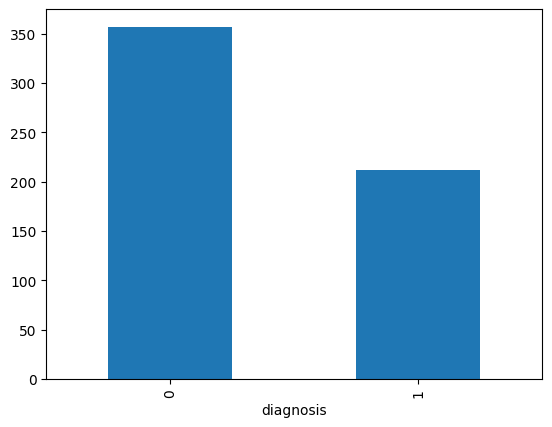

In [ ]:
df['diagnosis'].value_counts().plot(kind = 'bar')

In [ ]:
correlation_matrix = df.corr()

In [ ]:
correlation_matrix

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


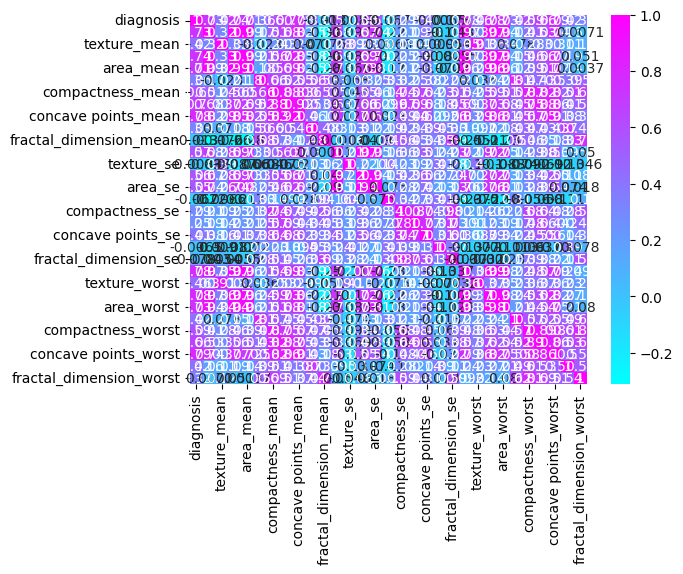

In [ ]:
sns.heatmap(correlation_matrix, cmap='cool', annot=True)
plt.show()


In [ ]:
df_original = df.copy()

In [ ]:
# Features to drop (to reduce multicollinearity)
features_to_drop = [
    # Size (mean)
    "perimeter_mean",
    "area_mean",

    # Size (worst)
    "perimeter_worst",
    "area_worst",

    # Shape (mean)
    "compactness_mean",
    "concavity_mean",

    # Shape (worst)
    "compactness_worst",
    "concavity_worst",

    # Weak SE features
    "texture_se",
    "smoothness_se",
    "symmetry_se"
]

# Drop features
df.drop(columns=features_to_drop, inplace = True)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   diagnosis                569 non-null    category
 1   radius_mean              569 non-null    float64 
 2   texture_mean             569 non-null    float64 
 3   smoothness_mean          569 non-null    float64 
 4   concave points_mean      569 non-null    float64 
 5   symmetry_mean            569 non-null    float64 
 6   fractal_dimension_mean   569 non-null    float64 
 7   radius_se                569 non-null    float64 
 8   perimeter_se             569 non-null    float64 
 9   area_se                  569 non-null    float64 
 10  compactness_se           569 non-null    float64 
 11  concavity_se             569 non-null    float64 
 12  concave points_se        569 non-null    float64 
 13  fractal_dimension_se     569 non-null    float64 
 14  radius_wor

In [ ]:
df.drop(columns = [
    "radius_se",
    "perimeter_se",
    "compactness_se",
    "concavity_se",
    "fractal_dimension_se"
], inplace = True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   diagnosis                569 non-null    category
 1   radius_mean              569 non-null    float64 
 2   texture_mean             569 non-null    float64 
 3   smoothness_mean          569 non-null    float64 
 4   concave points_mean      569 non-null    float64 
 5   symmetry_mean            569 non-null    float64 
 6   fractal_dimension_mean   569 non-null    float64 
 7   area_se                  569 non-null    float64 
 8   concave points_se        569 non-null    float64 
 9   radius_worst             569 non-null    float64 
 10  texture_worst            569 non-null    float64 
 11  smoothness_worst         569 non-null    float64 
 12  concave points_worst     569 non-null    float64 
 13  symmetry_worst           569 non-null    float64 
 14  fractal_di

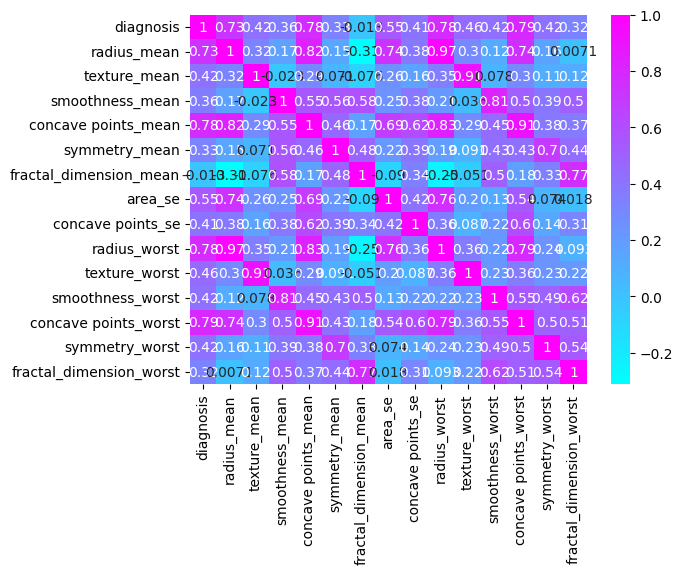

In [ ]:
final_corr_matrix = df.corr()
sns.heatmap(final_corr_matrix, cmap = 'cool', annot=True)
plt.show()

In [ ]:
target = 'diagnosis'
X = df.drop(columns = [target])
y = df[target]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [ ]:
logistic_regressor = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression())
])

In [ ]:
logistic_regressor.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', LogisticRegression())])

In [ ]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix
)

def evaluate_logistic_model(X_train, y_train, X_test, y_test, model):
    """
    Evaluates a trained binary classification model on train and test data
    """

    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Probabilities (needed for ROC-AUC)
    y_train_prob = model.predict_proba(X_train)[:, 1]
    y_test_prob = model.predict_proba(X_test)[:, 1]

    print("=== TRAIN SET ===")
    print("Accuracy:", accuracy_score(y_train, y_train_pred))
    print("Precision:", precision_score(y_train, y_train_pred))
    print("Recall:", recall_score(y_train, y_train_pred))
    print("F1-score:", f1_score(y_train, y_train_pred))
    print("ROC-AUC:", roc_auc_score(y_train, y_train_prob))
    print("Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred))

    print("\n=== TEST SET ===")
    print("Accuracy:", accuracy_score(y_test, y_test_pred))
    print("Precision:", precision_score(y_test, y_test_pred))
    print("Recall:", recall_score(y_test, y_test_pred))
    print("F1-score:", f1_score(y_test, y_test_pred))
    print("ROC-AUC:", roc_auc_score(y_test, y_test_prob))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))


In [ ]:
evaluate_logistic_model(X_train, y_train, X_test, y_test, logistic_regressor)

=== TRAIN SET ===
Accuracy: 0.978021978021978
Precision: 0.9760479041916168
Recall: 0.9644970414201184
F1-score: 0.9702380952380952
ROC-AUC: 0.9955517854926139
Confusion Matrix:
 [[282   4]
 [  6 163]]

=== TEST SET ===
Accuracy: 0.9824561403508771
Precision: 1.0
Recall: 0.9534883720930233
F1-score: 0.9761904761904762
ROC-AUC: 0.99737962659679
Confusion Matrix:
 [[71  0]
 [ 2 41]]
